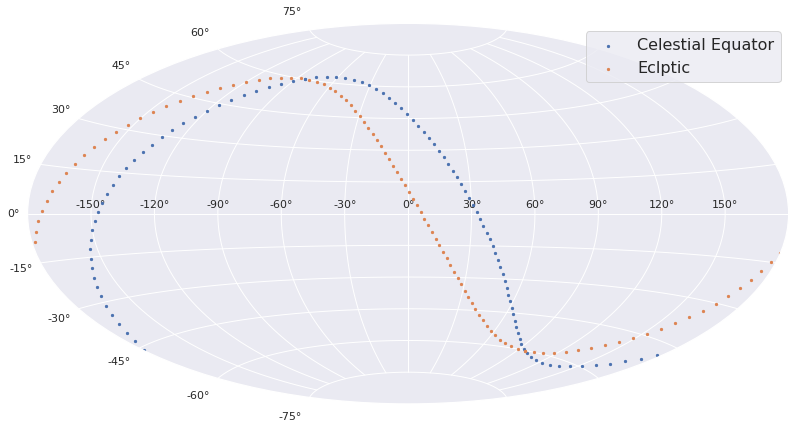

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from astropy.table import Table, vstack

from astropy.coordinates import SkyCoord
from astropy import units as u

ra_all = np.linspace(-180, 180, 100)
dec_0 = np.zeros(100)

# Transform equatorial coordinates to galactic
eq = SkyCoord(ra_all, dec_0, unit=u.deg)
gal = eq.galactic
l_plot, b_plot = gal.l.wrap_at('180d').radian, gal.b.radian


lon = np.linspace(0, 360, 100)
lat = np.zeros(100)

# Transform ecliptic coordinates to galactic
ecl = SkyCoord(lon, lat, unit=u.deg, frame='barycentricmeanecliptic')
ecl_gal = ecl.transform_to('galactic')
l_ecl_gal, b_ecl_gal = ecl_gal.l.wrap_at('180d').radian, ecl_gal.b.radian


plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

plt.scatter(l_plot, b_plot, s=5, label='Celestial Equator')
plt.scatter(l_ecl_gal, b_ecl_gal, s=5, label='Eclptic')


plt.grid(True)
plt.legend(fontsize=16)

plt.show()

# With my data (Flag = 0)

In [2]:
table = Table.read("../3filter_flat0/Halpha-DR3_errorFlag0_merge.ecsv", format="ascii.ecsv")

In [3]:
ra = table["RA"]
dec = table["DEC"]


In [4]:
# Transform equatorial coordinates to galactic
eq = SkyCoord(ra, dec, unit=u.deg)
gal = eq.galactic
l_plot, b_plot = gal.l.wrap_at('180d').radian, gal.b.radian

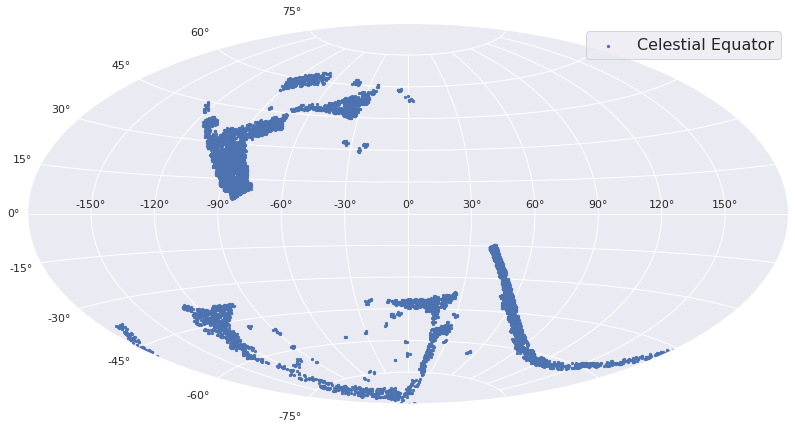

In [5]:

plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

plt.scatter(l_plot, b_plot, s=5, label='Celestial Equator')

plt.grid(True)
plt.legend(fontsize=16)

plt.show()

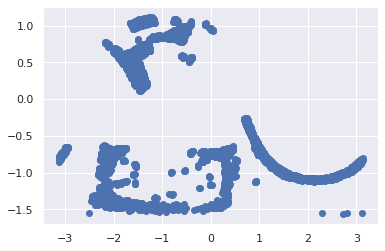

In [6]:
plt.plot(l_plot, b_plot, "o", label='Celestial Equator')

Text(0, 0.5, 'Galactic Latitude')

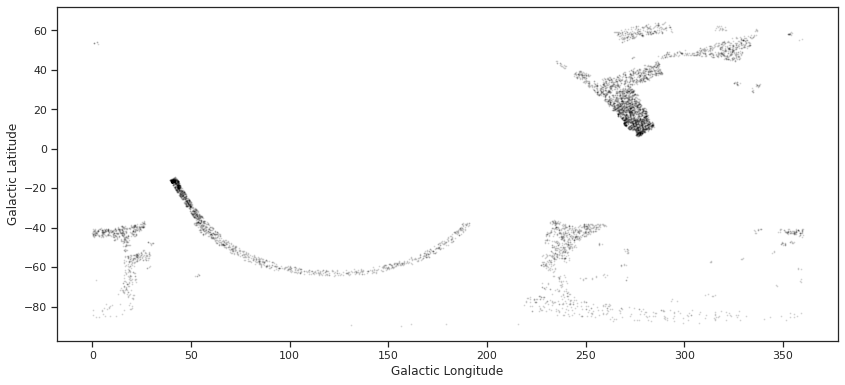

In [13]:
color_palette = sns.color_palette('Paired', 55)
sns.set_style("ticks", {"xtick.major.size": 180, "ytick.major.size": 180})

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(gal.l.degree, gal.b.degree , s=1, color='black', alpha=0.1)
    #ax.set_xlim(360., 0.)
    #ax.set_ylim(-90., 90.)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

In [14]:
l_rad = gal.l.radian
l_rad[l_rad > np.pi] -= 2. * np.pi
b_rad = gal.b.radian


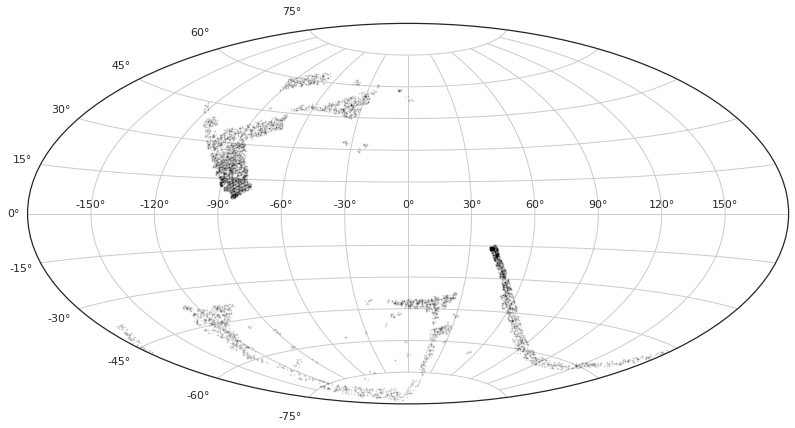

In [16]:
color_palette = sns.color_palette('Paired', 55)
with sns.axes_style("ticks"):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(1,1,1, projection='aitoff')
    ax.scatter(l_rad, b_rad, s=1, color='black', alpha=0.1)
    ax.grid()

# Other tecniques